> **WARNING** It is more than recommended to work on a copy of that file (_i.e._ not IN the cloned git repository) otherwise next time you update the repo with `git pull` you'll face a `merging` issue and these are tricky to manage

# Managing simple boundary conditions

In this notebook, we will use the basic `trackscape` module, aka without the python helper, to run fluvial landscapes with different boundary conditions.

## Setting up the Parameters

See Notebook `Tsc_0_...` for the details. The important bit for this tutorial is the `boundary` string. `"4edges"`, as the name suggests, means that the 4 edges of my raster-like domain are fixed boundaries. Flow can escape from all the nodes around the raster.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dagger as dag


%matplotlib widget



ny,nx = 256,256
dy,dx = 200,200
Urate = 5e-4
dt = 500
Kr = 1e-5
Ks = 2e-5
dep = 4
rshp = (ny,nx)

# Initialising an empty model in the variable ts
ts = dag.trackscape()
# Initialising the topography and its dimensions
ts.init_random(dag.NOISE.WHITE, nx, ny,dx,dy,"4edges")

# FUnctions to set parameters as global homogeneous values (if not initialised, there is a default value)
ts.set_single_Kr(Kr)
ts.set_single_Ks(Ks)
ts.set_single_depcoeff(dep)

# Deactivate hilllsopes processes
ts.hillslopes_off()

## Running the model

Let's run the model. You can set ndt to 0 to skip that part, or even jump to the next section, or finally use the stop button at the top of the script to stop the model execution without stopping the all notebook.

This first cell generates the figure:

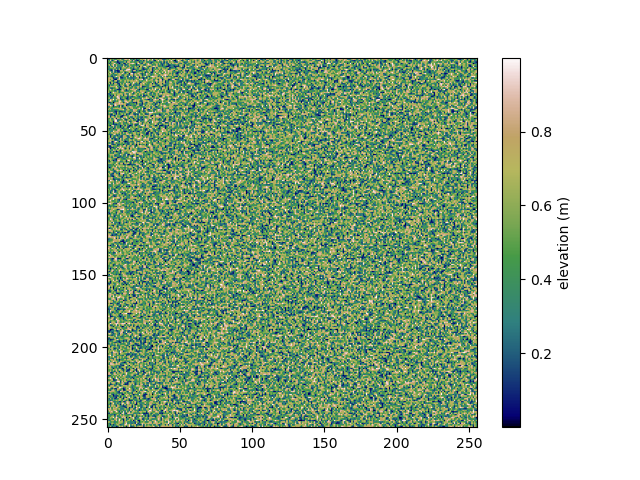

In [2]:
fig,ax = plt.subplots()

topo = ts.get_topo().reshape(rshp)
im = ax.imshow(topo, cmap = "gist_earth")
plt.colorbar(im, label = "elevation (m)")

**Let's now run the model `ndt` times, and update the figure every `nupdate` timesteps** (updating the figure too often can be costly).

> **Note** the figure is updated in place, just above. If you deactivated the widget, it won't work

In [3]:
ndt = 10000
nupdate = 100

# Main loop
for i in range(ndt):
    # Calling the run function for single flow
    ts.run_SFD(dt)
    # Calling hte block uplift funtion)
    ts.block_uplift(Urate,dt)
    
    # If nupdate^th timestep: I update the fig
    if(i%nupdate == 0):
        ## printing the timestep
        print("                   ",end = "\r")
        print("Timestep",i,end = "\r")
        
        #GEtting the topography
        topo = ts.get_topo().reshape(rshp)
        # Setting the new data
        im.set_data(topo)
        # Setting the new colorbar limits
        im.set_clim(topo.min(), topo.max())
        # Apply the update
        fig.canvas.draw()
        
        
        
        

## Changing boundary conditions

There is no "good" or "bad" boundary conditions, it really depends on the test case. `"4edges"` is the least complicated way to use boundaries. However it can generate geometrical artifacts by maximising boundary effect. One way to go around that problem is to use pedriodic/cyclic boundaries. These types of boundaries connect one side of the landscape to another to simulate, for example, an infinite range. The range is not inifinite in length, but is not affected by side base level.

The two built-in periodic options are: `"periodic_EW"` and `"periodic_NS"`, repectively connecting the left-right and top-bottom boundaries together. Let's try one out (feel free to test the other one). Note that I elongated the model dimensions in one of the directions.

In [ ]:
ny,nx = 512,256
dy,dx = 200,200
Urate = 5e-4
dt = 500
Kr = 1e-5
Ks = 2e-5
dep = 4
rshp = (ny,nx)

# Initialising an empty model in the variable ts
ts = dag.trackscape()
# Initialising the topography and its dimensions
ts.init_random(dag.NOISE.WHITE, nx, ny,dx,dy,"periodic_NS")

# FUnctions to set parameters as global homogeneous values (if not initialised, there is a default value)
ts.set_single_Kr(Kr)
ts.set_single_Ks(Ks)
ts.set_single_depcoeff(dep)

# Deactivate hilllsopes processes
ts.hillslopes_off()

In [ ]:
fig,ax = plt.subplots()

topo = ts.get_topo().reshape(rshp)
im = ax.imshow(topo, cmap = "gist_earth")
plt.colorbar(im, label = "elevation (m)")
plt.tight_layout()

In [ ]:
ndt = 10000
nupdate = 100

# Main loop
for i in range(ndt):
    # Calling the run function for single flow
    ts.run_SFD(dt)
    # Calling hte block uplift funtion)
    ts.block_uplift(Urate,dt)
    
    # If nupdate^th timestep: I update the fig
    if(i%nupdate == 0):
        ## printing the timestep
        print("                   ",end = "\r")
        print("Timestep",i,end = "\r")
        
        #GEtting the topography
        topo = ts.get_topo().reshape(rshp)
        # Setting the new data
        im.set_data(topo)
        # Setting the new colorbar limits
        im.set_clim(topo.min(), topo.max())
        # Apply the update
        fig.canvas.draw()

## Next steps in the boundaries

This notebook really only introduces the concept and most classic uses of boundary conditions. It also cover most of the common uses for theoretical studies. The next steps will be detailed in other notebooks, and will deal with more complex cases - e.g. stricly fixed boundaries vs evolving boundaries; flexible boundaries that can give fluxes to lower neighbours; internal boundaries to only model one irregular watershed; ...
